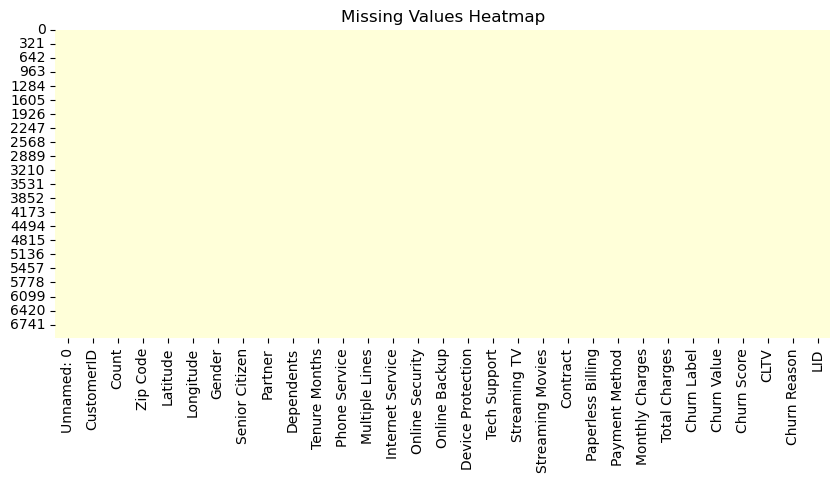

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df =pd.read_excel("Final_Complete_cleaned.xlsx")
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()



In [2]:
df.head()

,Unnamed: 0,CustomerID,Count,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,LID
0,0,3668-QPYBK,1,90003,33.964131,-118.272783,1,0,0,0,...,1,4,53.85,108.15,1,1,86,3239.0,1,1
1,1,9237-HQITU,1,90005,34.059281,-118.307420,0,0,0,1,...,1,3,70.70,151.65,1,1,67,2701.0,2,1
2,2,9305-CDSKC,1,90006,34.048013,-118.293953,0,0,0,1,...,1,3,99.65,820.50,1,1,86,5372.0,2,1
3,3,7892-POOKP,1,90010,34.062125,-118.315709,0,0,1,1,...,1,3,104.80,3046.05,1,1,84,5003.0,2,1
4,4,0280-XJGEX,1,90015,34.039224,-118.266293,1,0,0,1,...,1,1,103.70,5036.30,1,1,89,5340.0,3,1


In [3]:
df=df.drop(columns=["CustomerID","Churn Reason"])

In [4]:

df = df.drop(columns=["Unnamed: 0"])

In [5]:
df=df.drop(columns=["LID","Zip Code","Latitude","Longitude","Churn Score","Churn Value"])

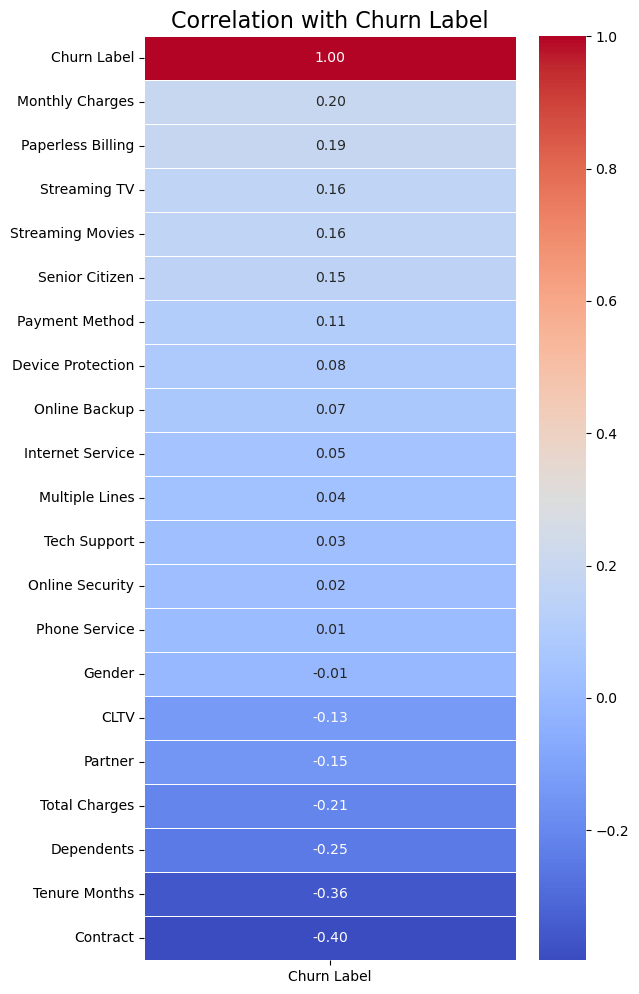

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Ensure Churn Label is numeric
if df["Churn Label"].dtype == "object":
    df["Churn Label"] = df["Churn Label"].map({"Yes": 1, "No": 0})

# Select numeric columns only
numeric_df = df.select_dtypes(include=["number"])

# Get correlations with Churn Label
correlations = (
    numeric_df.corr()[["Churn Label"]]
    .dropna()                                 # remove NaN rows like 'Count'
    .sort_values(by="Churn Label", ascending=False)
)

# Plot heatmap
plt.figure(figsize=(6, 12))
sns.heatmap(correlations, annot=True, cmap="coolwarm", cbar=True, linewidths=0.5, fmt=".2f")
plt.title("Correlation with Churn Label", fontsize=16)
plt.show()



In [7]:
uncorrelated =["Phone Service","Gender"]
df=df.drop(columns=uncorrelated)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Senior Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   int64  
 3   Dependents         7043 non-null   int64  
 4   Tenure Months      7043 non-null   int64  
 5   Multiple Lines     7043 non-null   int64  
 6   Internet Service   7043 non-null   int64  
 7   Online Security    7043 non-null   int64  
 8   Online Backup      7043 non-null   int64  
 9   Device Protection  7043 non-null   int64  
 10  Tech Support       7043 non-null   int64  
 11  Streaming TV       7043 non-null   int64  
 12  Streaming Movies   7043 non-null   int64  
 13  Contract           7043 non-null   int64  
 14  Paperless Billing  7043 non-null   int64  
 15  Payment Method     7043 non-null   int64  
 16  Monthly Charges    7043 

In [9]:
df=df.drop(columns=["Count"])

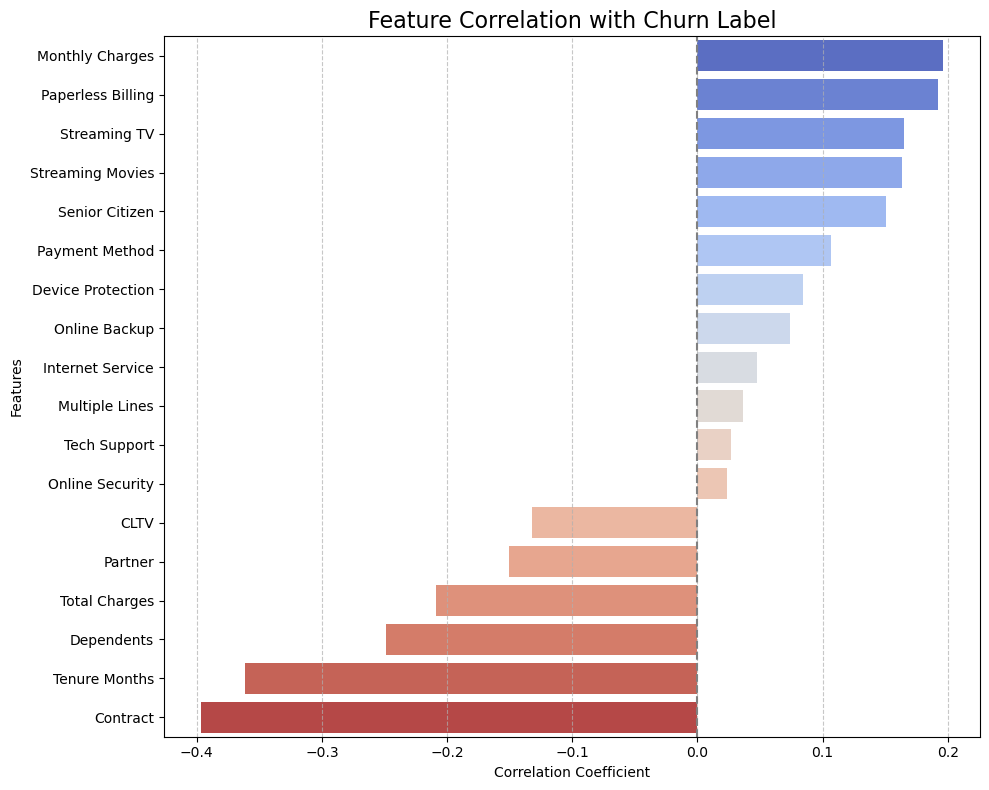

In [10]:

# Assuming 'Churn' is the name of your target column
correlation_with_churn = df.corr()['Churn Label'].drop('Churn Label')  # Drop self-correlation

# Sort values for better visualization
correlation_with_churn = correlation_with_churn.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_churn.values, y=correlation_with_churn.index, palette="coolwarm")
plt.title("Feature Correlation with Churn Label", fontsize=16)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.axvline(0, color='grey', linestyle='--')  # Add zero line for reference
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7043 non-null   int64  
 1   Partner            7043 non-null   int64  
 2   Dependents         7043 non-null   int64  
 3   Tenure Months      7043 non-null   int64  
 4   Multiple Lines     7043 non-null   int64  
 5   Internet Service   7043 non-null   int64  
 6   Online Security    7043 non-null   int64  
 7   Online Backup      7043 non-null   int64  
 8   Device Protection  7043 non-null   int64  
 9   Tech Support       7043 non-null   int64  
 10  Streaming TV       7043 non-null   int64  
 11  Streaming Movies   7043 non-null   int64  
 12  Contract           7043 non-null   int64  
 13  Paperless Billing  7043 non-null   int64  
 14  Payment Method     7043 non-null   int64  
 15  Monthly Charges    7043 non-null   float64
 16  Total Charges      7043 

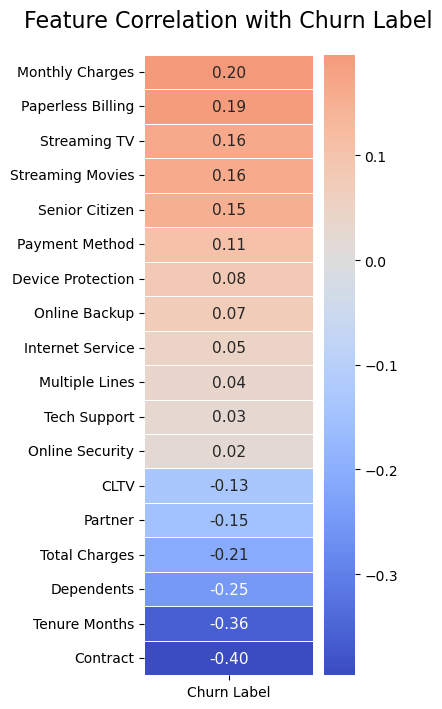

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation with 'Churn' only
corr_with_churn = df.corr()[['Churn Label']].drop('Churn Label')  # Keep only Churn column, drop self-correlation

# Sort by correlation strength (descending)
corr_with_churn = corr_with_churn.sort_values(by='Churn Label', ascending=False)

# Plot heatmap
plt.figure(figsize=(4, len(corr_with_churn) * 0.4))  # Dynamically adjust height
sns.heatmap(corr_with_churn, 
            annot=True, 
            cmap="coolwarm", 
            cbar=True, 
            center=0,               # Center colormap at 0 for better visual balance
            linewidths=0.5, 
            fmt=".2f",
            annot_kws={"size": 11})
plt.title("Feature Correlation with Churn Label", fontsize=16, pad=20)
plt.xlabel("")  # Hide x-axis label since it's just "Churn"
plt.tight_layout()
plt.show()

In [13]:
df=df.drop(columns=["Payment Method","CLTV"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7043 non-null   int64  
 1   Partner            7043 non-null   int64  
 2   Dependents         7043 non-null   int64  
 3   Tenure Months      7043 non-null   int64  
 4   Multiple Lines     7043 non-null   int64  
 5   Internet Service   7043 non-null   int64  
 6   Online Security    7043 non-null   int64  
 7   Online Backup      7043 non-null   int64  
 8   Device Protection  7043 non-null   int64  
 9   Tech Support       7043 non-null   int64  
 10  Streaming TV       7043 non-null   int64  
 11  Streaming Movies   7043 non-null   int64  
 12  Contract           7043 non-null   int64  
 13  Paperless Billing  7043 non-null   int64  
 14  Monthly Charges    7043 non-null   float64
 15  Total Charges      7043 non-null   float64
 16  Churn Label        7043 

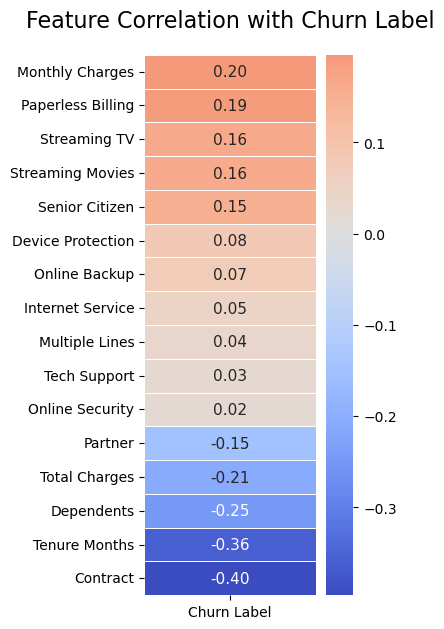

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation with 'Churn' only
corr_with_churn = df.corr()[['Churn Label']].drop('Churn Label')  # Keep only Churn column, drop self-correlation

# Sort by correlation strength (descending)
corr_with_churn = corr_with_churn.sort_values(by='Churn Label', ascending=False)

# Plot heatmap
plt.figure(figsize=(4, len(corr_with_churn) * 0.4))  # Dynamically adjust height
sns.heatmap(corr_with_churn, 
            annot=True, 
            cmap="coolwarm", 
            cbar=True, 
            center=0,               # Center colormap at 0 for better visual balance
            linewidths=0.5, 
            fmt=".2f",
            annot_kws={"size": 11})
plt.title("Feature Correlation with Churn Label", fontsize=16, pad=20)
plt.xlabel("")  # Hide x-axis label since it's just "Churn"
plt.tight_layout()
plt.show()